## Goal: Predict compressive strength (csMPa) using concrete mix components and curing age.


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso


## Loading the dataset

In [3]:
data = pd.read_csv('Concrete_Data_Yeh.csv')

# Display the first few rows of the dataset
print("Dataset Sample:\n", data.head())

# Display basic information about the dataset
print("\nDataset Info:\n")
data.info()


Dataset Sample:
    cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water         

In [5]:
# making a duplicate of the dataset 
df= data.copy()


In [9]:
df.shape

(1030, 9)

## Checking for missing values

In [6]:
# Checking for missing values
if df.isnull().sum().sum() > 0:
    print("Missing values found:\n", data.isnull().sum())
else:
    print("No missing values in the dataset.")


No missing values in the dataset.


## Data Exploration

In [10]:
# Statistical summary of the dataset
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
             cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
m

In [12]:
df.corr()

cement      slag    flyash     water  superplasticizer  \
cement            1.000000 -0.275216 -0.397467 -0.081587          0.092386   
slag             -0.275216  1.000000 -0.323580  0.107252          0.043270   
flyash           -0.397467 -0.323580  1.000000 -0.256984          0.377503   
water            -0.081587  0.107252 -0.256984  1.000000         -0.657533   
superplasticizer  0.092386  0.043270  0.377503 -0.657533          1.000000   
coarseaggregate  -0.109349 -0.283999 -0.009961 -0.182294         -0.265999   
fineaggregate    -0.222718 -0.281603  0.079108 -0.450661          0.222691   
age               0.081946 -0.044246 -0.154371  0.277618         -0.192700   
csMPa             0.497832  0.134829 -0.105755 -0.289633          0.366079   

                  coarseaggregate  fineaggregate       age     csMPa  
cement                  -0.109349      -0.222718  0.081946  0.497832  
slag                    -0.283999      -0.281603 -0.044246  0.134829  
flyash                  -0.009961       0.079108 -0.154371 -0.105755  
water                   -0.182294      -0.450661  0.277618 -0.289633  
superplasticizer        -0.265999       0.222691 -0.192700  0.366079  
coarseaggregate          1.000000      -0.178481 -0.003016 -0.164935  
fineaggregate           -0.178481       1.000000 -0.156095 -0.167241  
age                     -0.003016      -0.156095  1.000000  0.328873  
csMPa                   -0.164935      -0.167241  0.328873  1.000000

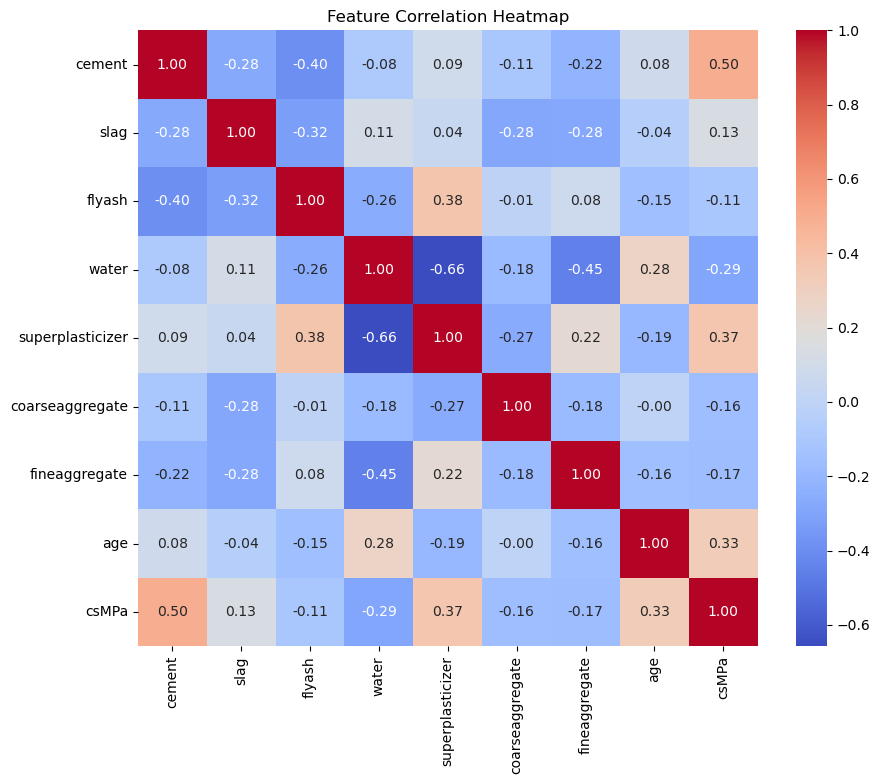

In [11]:
# Visualize feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#### Insight
**Cement:**
Positive correlation of 0.4978 with csMPa, indicating that increased cement content generally leads to higher compressive strength. This is expected, as cement is a key binder in concrete and directly contributes to strength.

**Slag:**
Weak positive correlation of 0.1348 with csMPa. Although there is some positive correlation, the relationship is relatively weak. Slag may contribute to strength, but its effect is not as strong as that of cement.

**Flyash:**
Negative correlation of -0.1058 with csMPa. Flyash tends to reduce compressive strength in this dataset, which may be due to its varying replacement ratios in different mixes. However, the correlation is weak.

**Water:**
Negative correlation of -0.2896 with csMPa, indicating that higher water content leads to lower compressive strength. This is consistent with the principle that too much water can reduce the strength of concrete.

**Superplasticizer:**
Positive correlation of 0.3661 with csMPa, showing that the use of superplasticizers, which improve workability, may contribute positively to compressive strength. However, this correlation is moderate.

**Coarse Aggregate:**
Weak negative correlation of -0.1649 with csMPa, suggesting that the amount of coarse aggregate might have a minimal negative impact on compressive strength. The relationship is not very strong.

**Fine Aggregate:**
Weak negative correlation of -0.1672 with csMPa, similar to coarse aggregate, indicating a slight negative impact of fine aggregate on strength. Again, this relationship is weak.

**Age:**
Moderate positive correlation of 0.3289 with csMPa, suggesting that age (curing time) positively affects compressive strength. Older concrete tends to have higher strength as it continues to cure and gain strength over time.


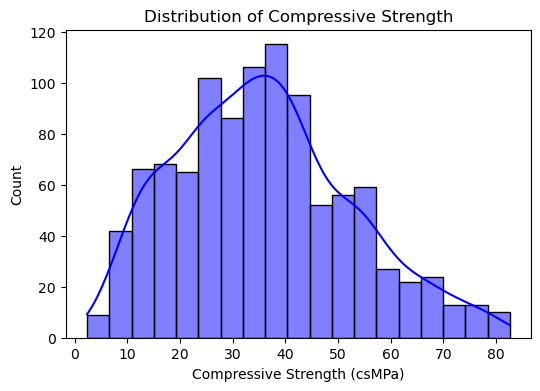

In [13]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(df['csMPa'], kde=True, color='blue')
plt.title("Distribution of Compressive Strength")
plt.xlabel("Compressive Strength (csMPa)")
plt.show()

Shape of your Data Set loaded: (1030, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################
To fix these data quality issues in 

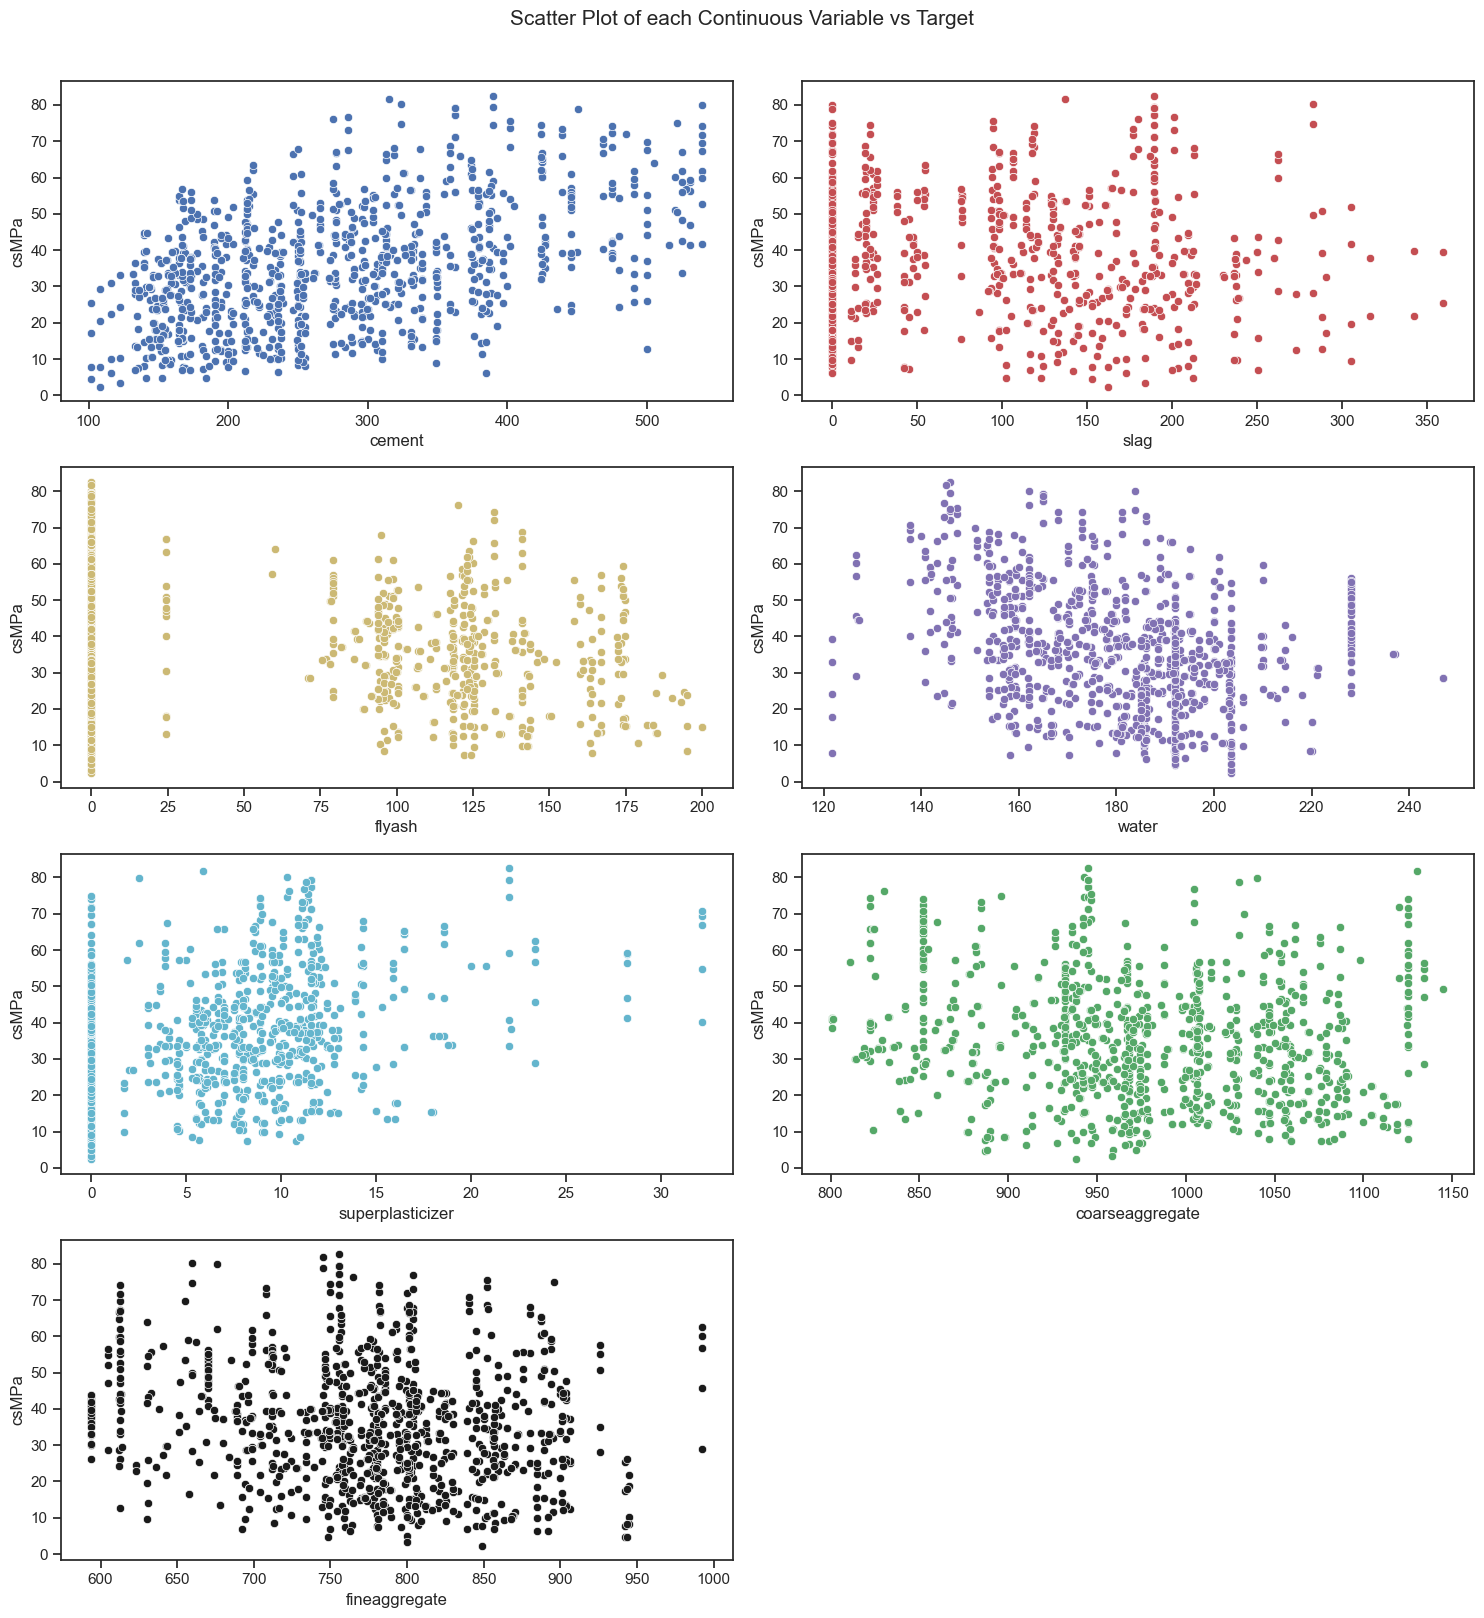

Number of All Scatter Plots = 28


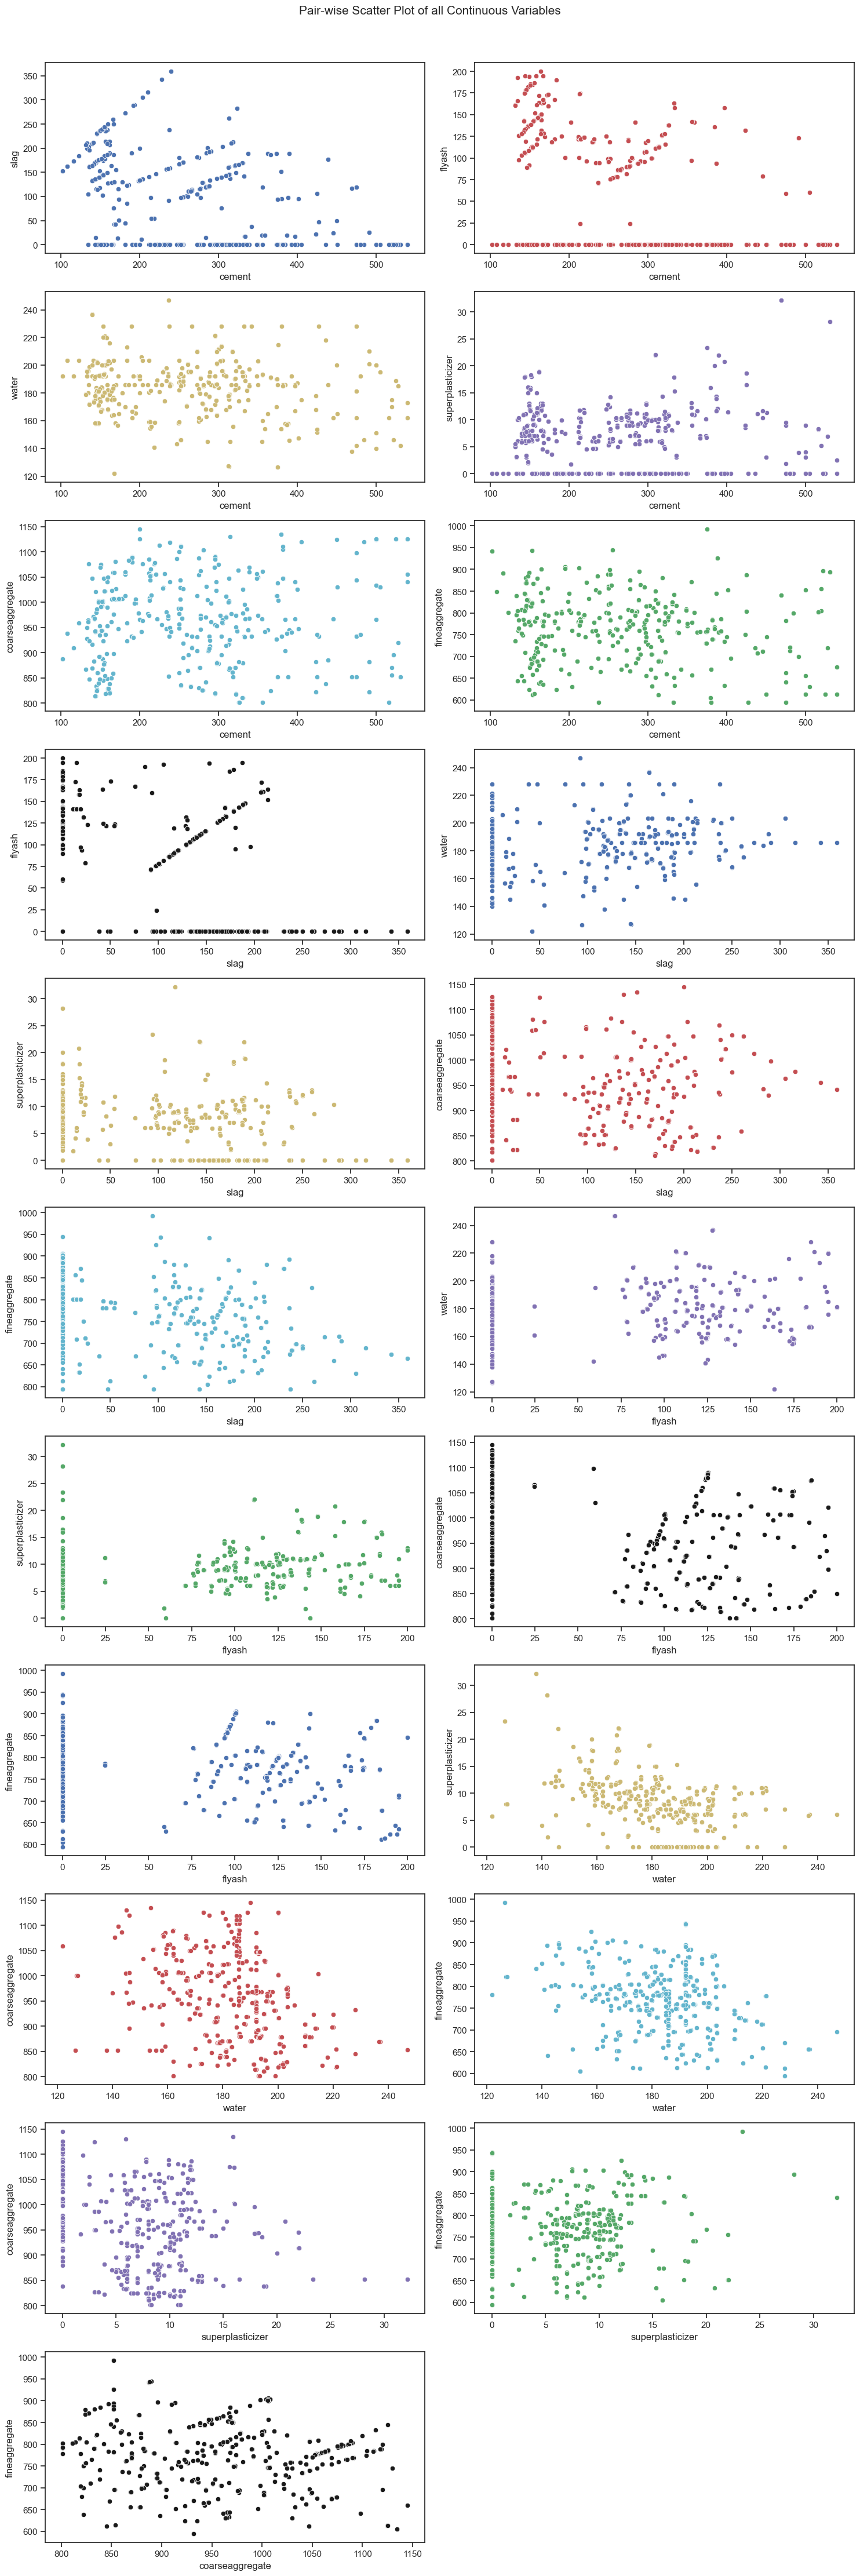

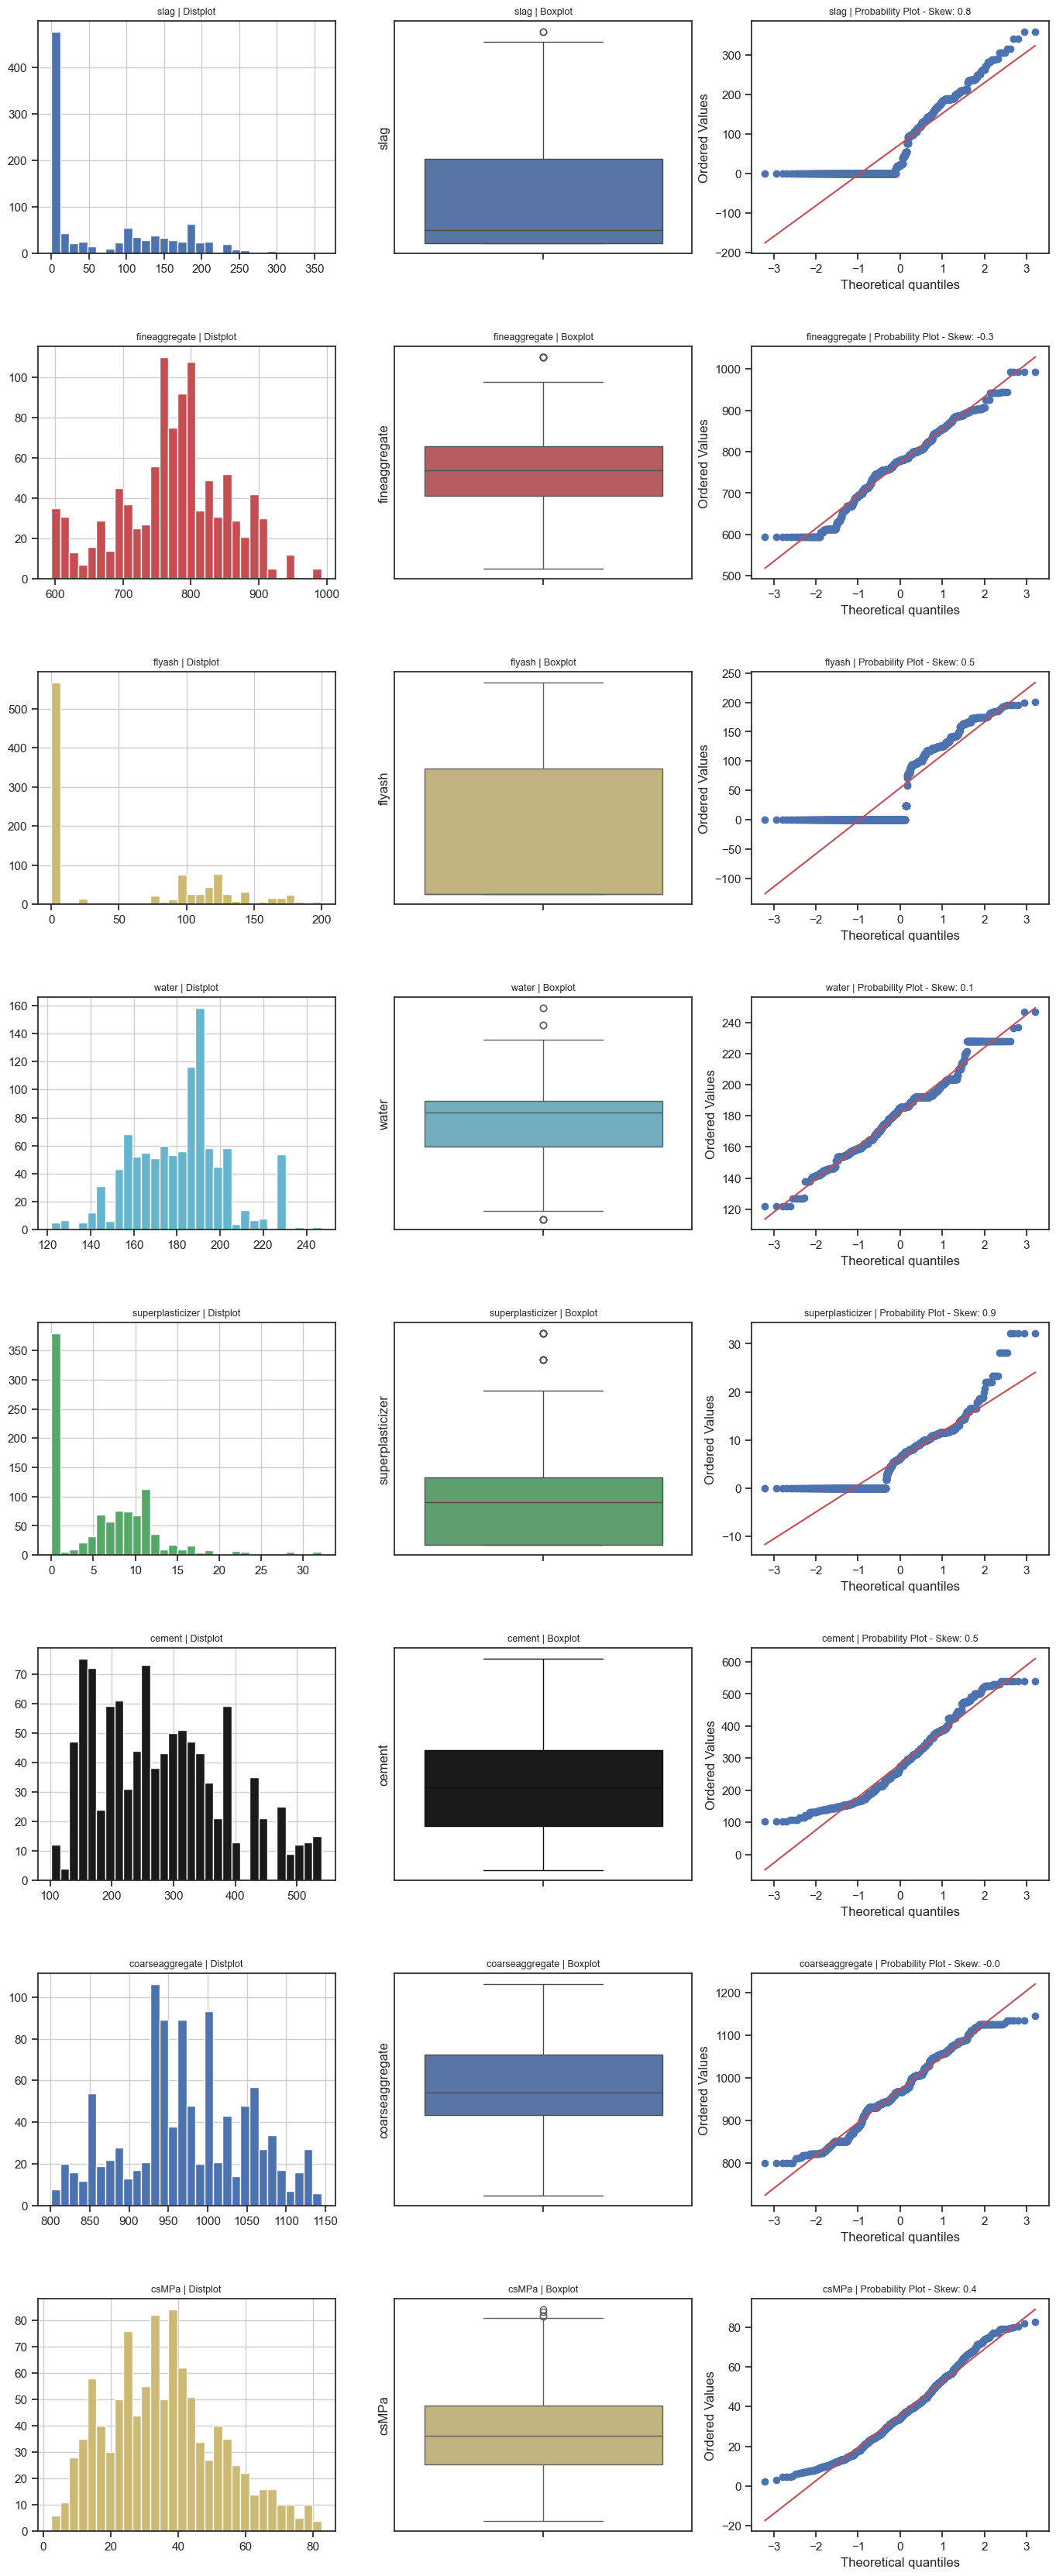

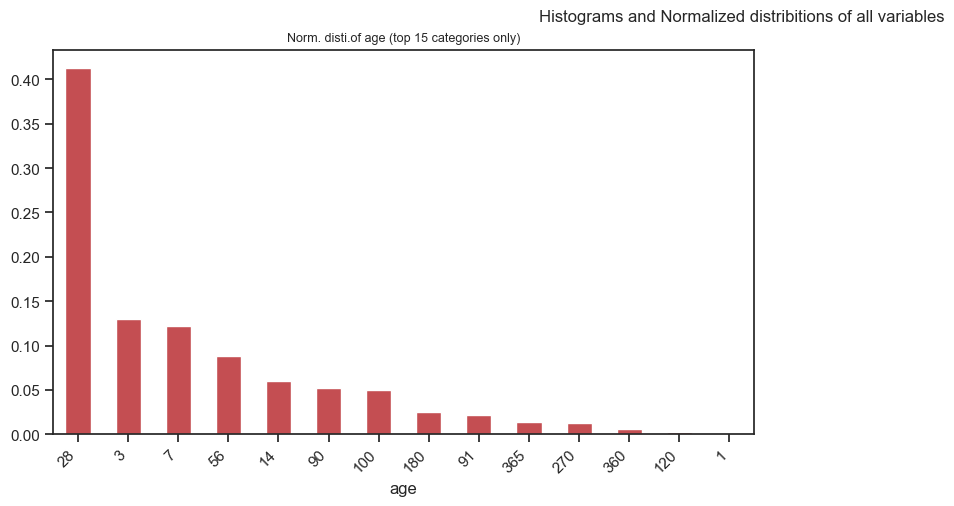

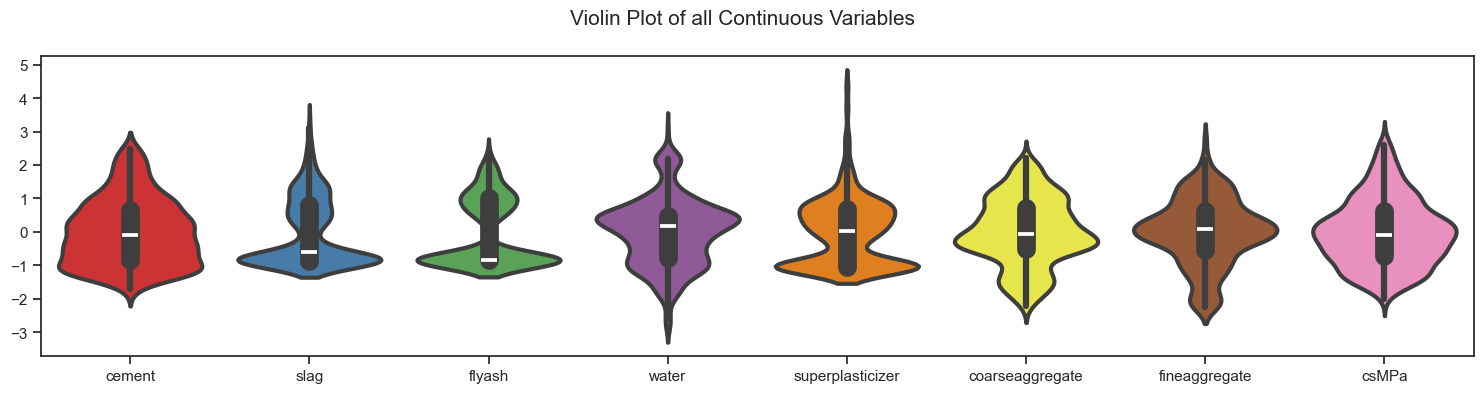

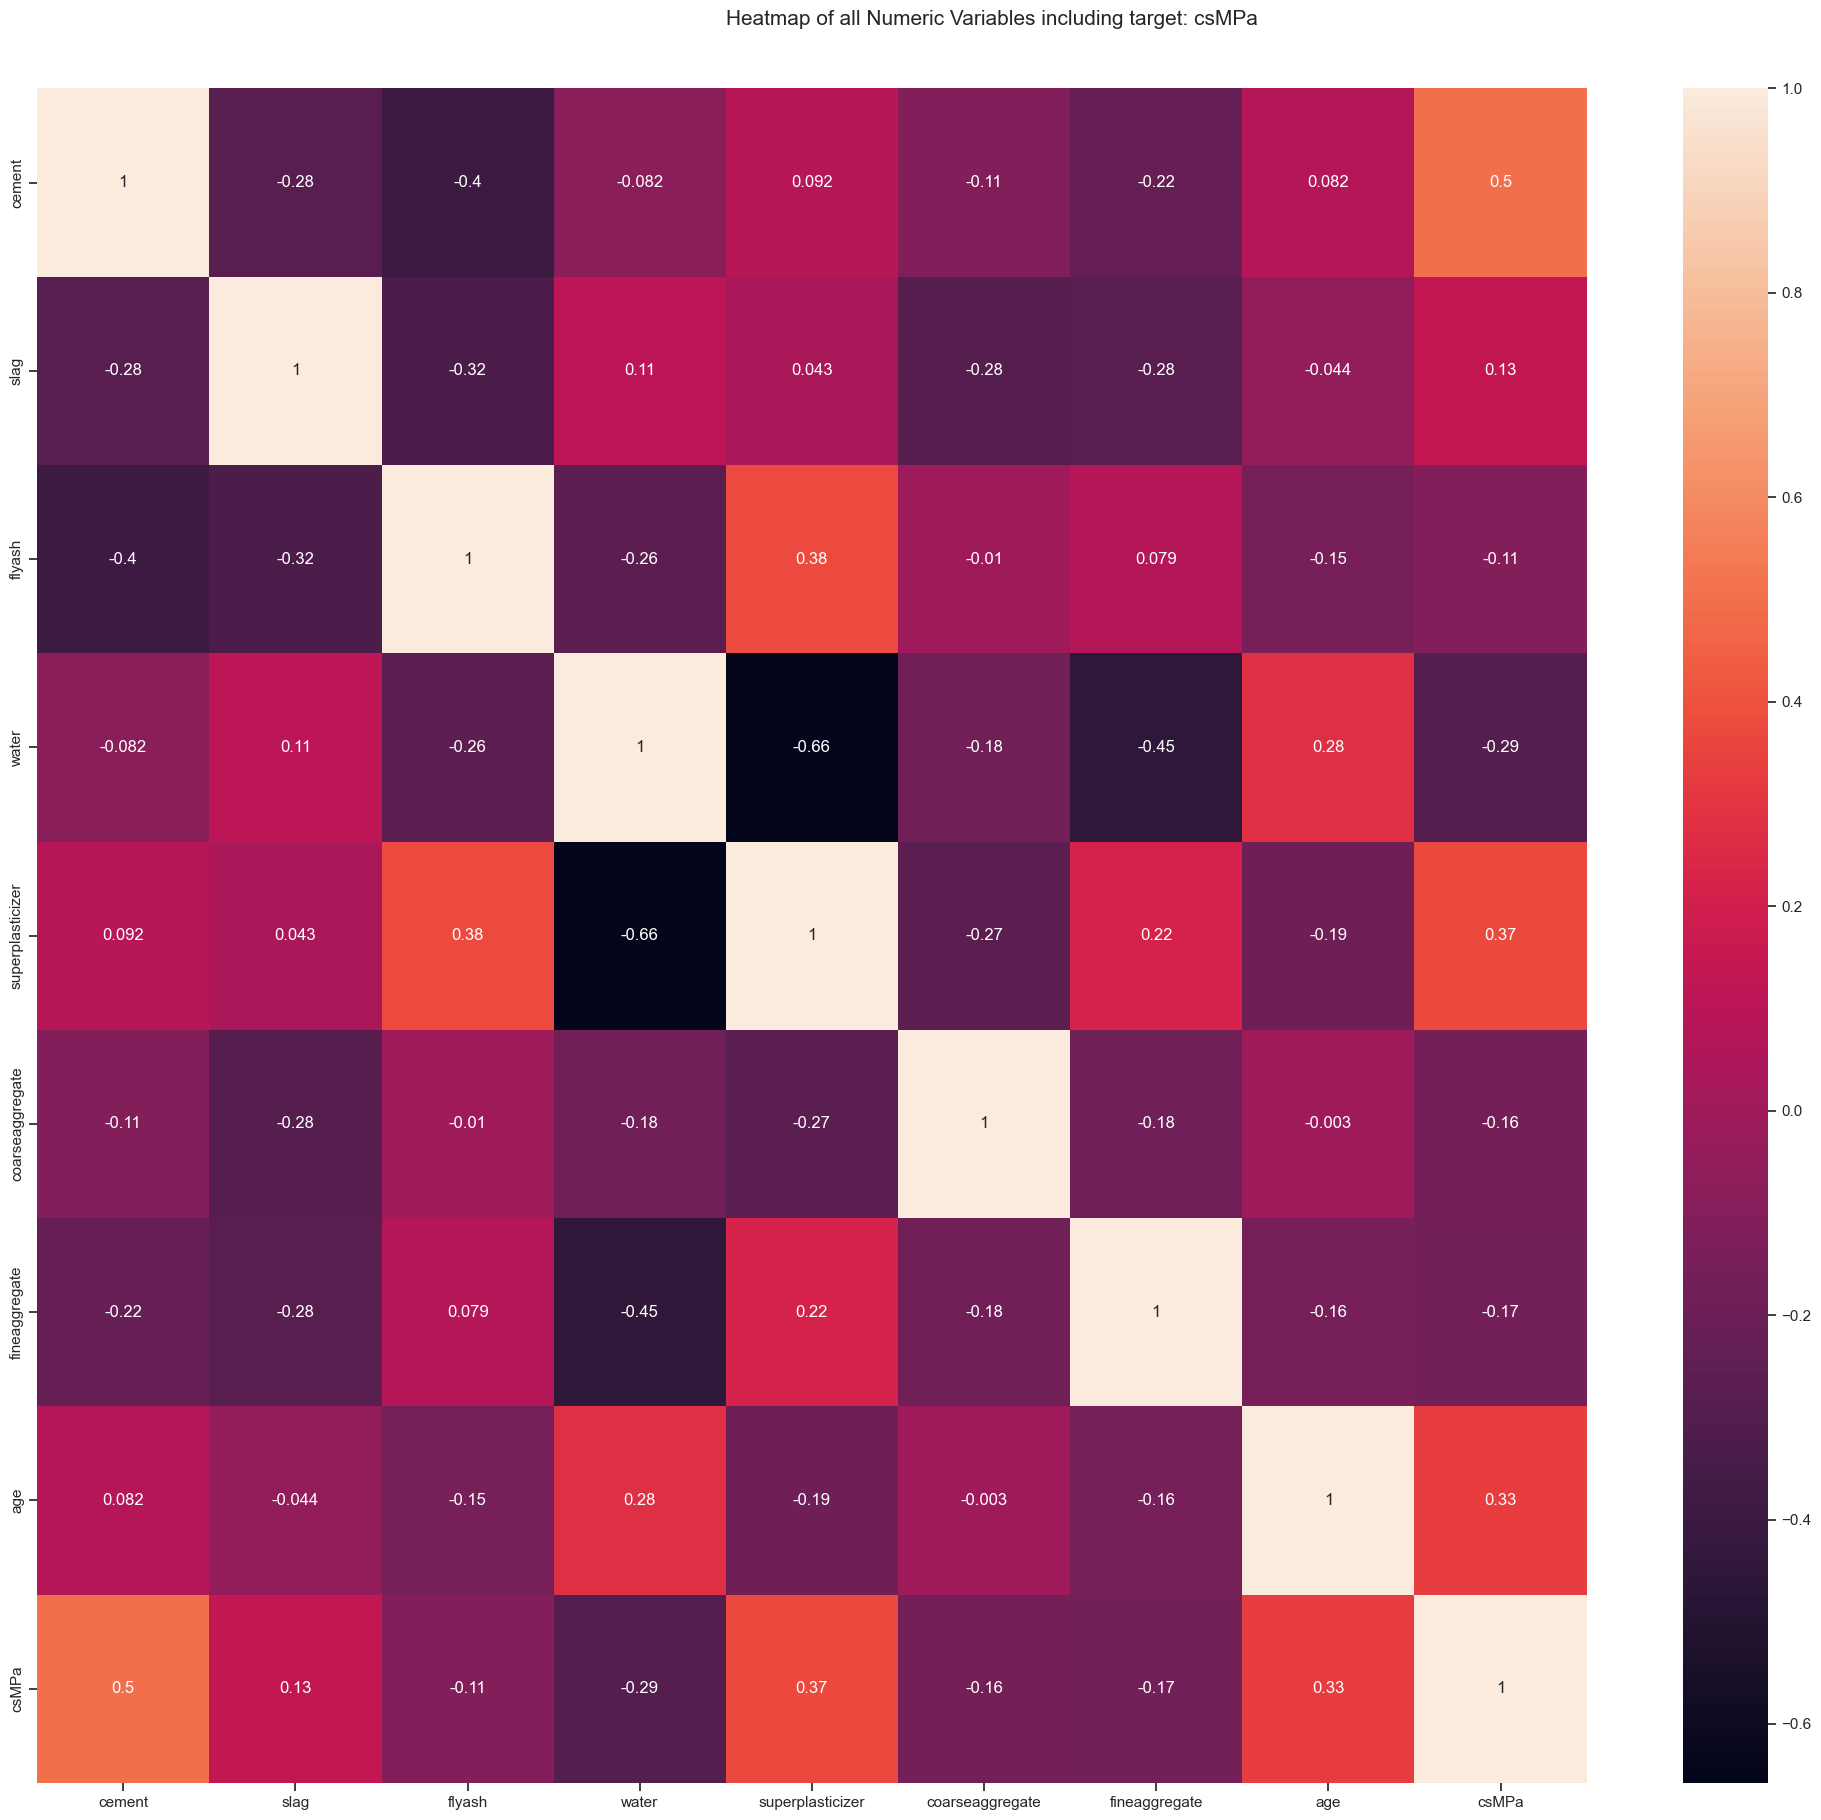

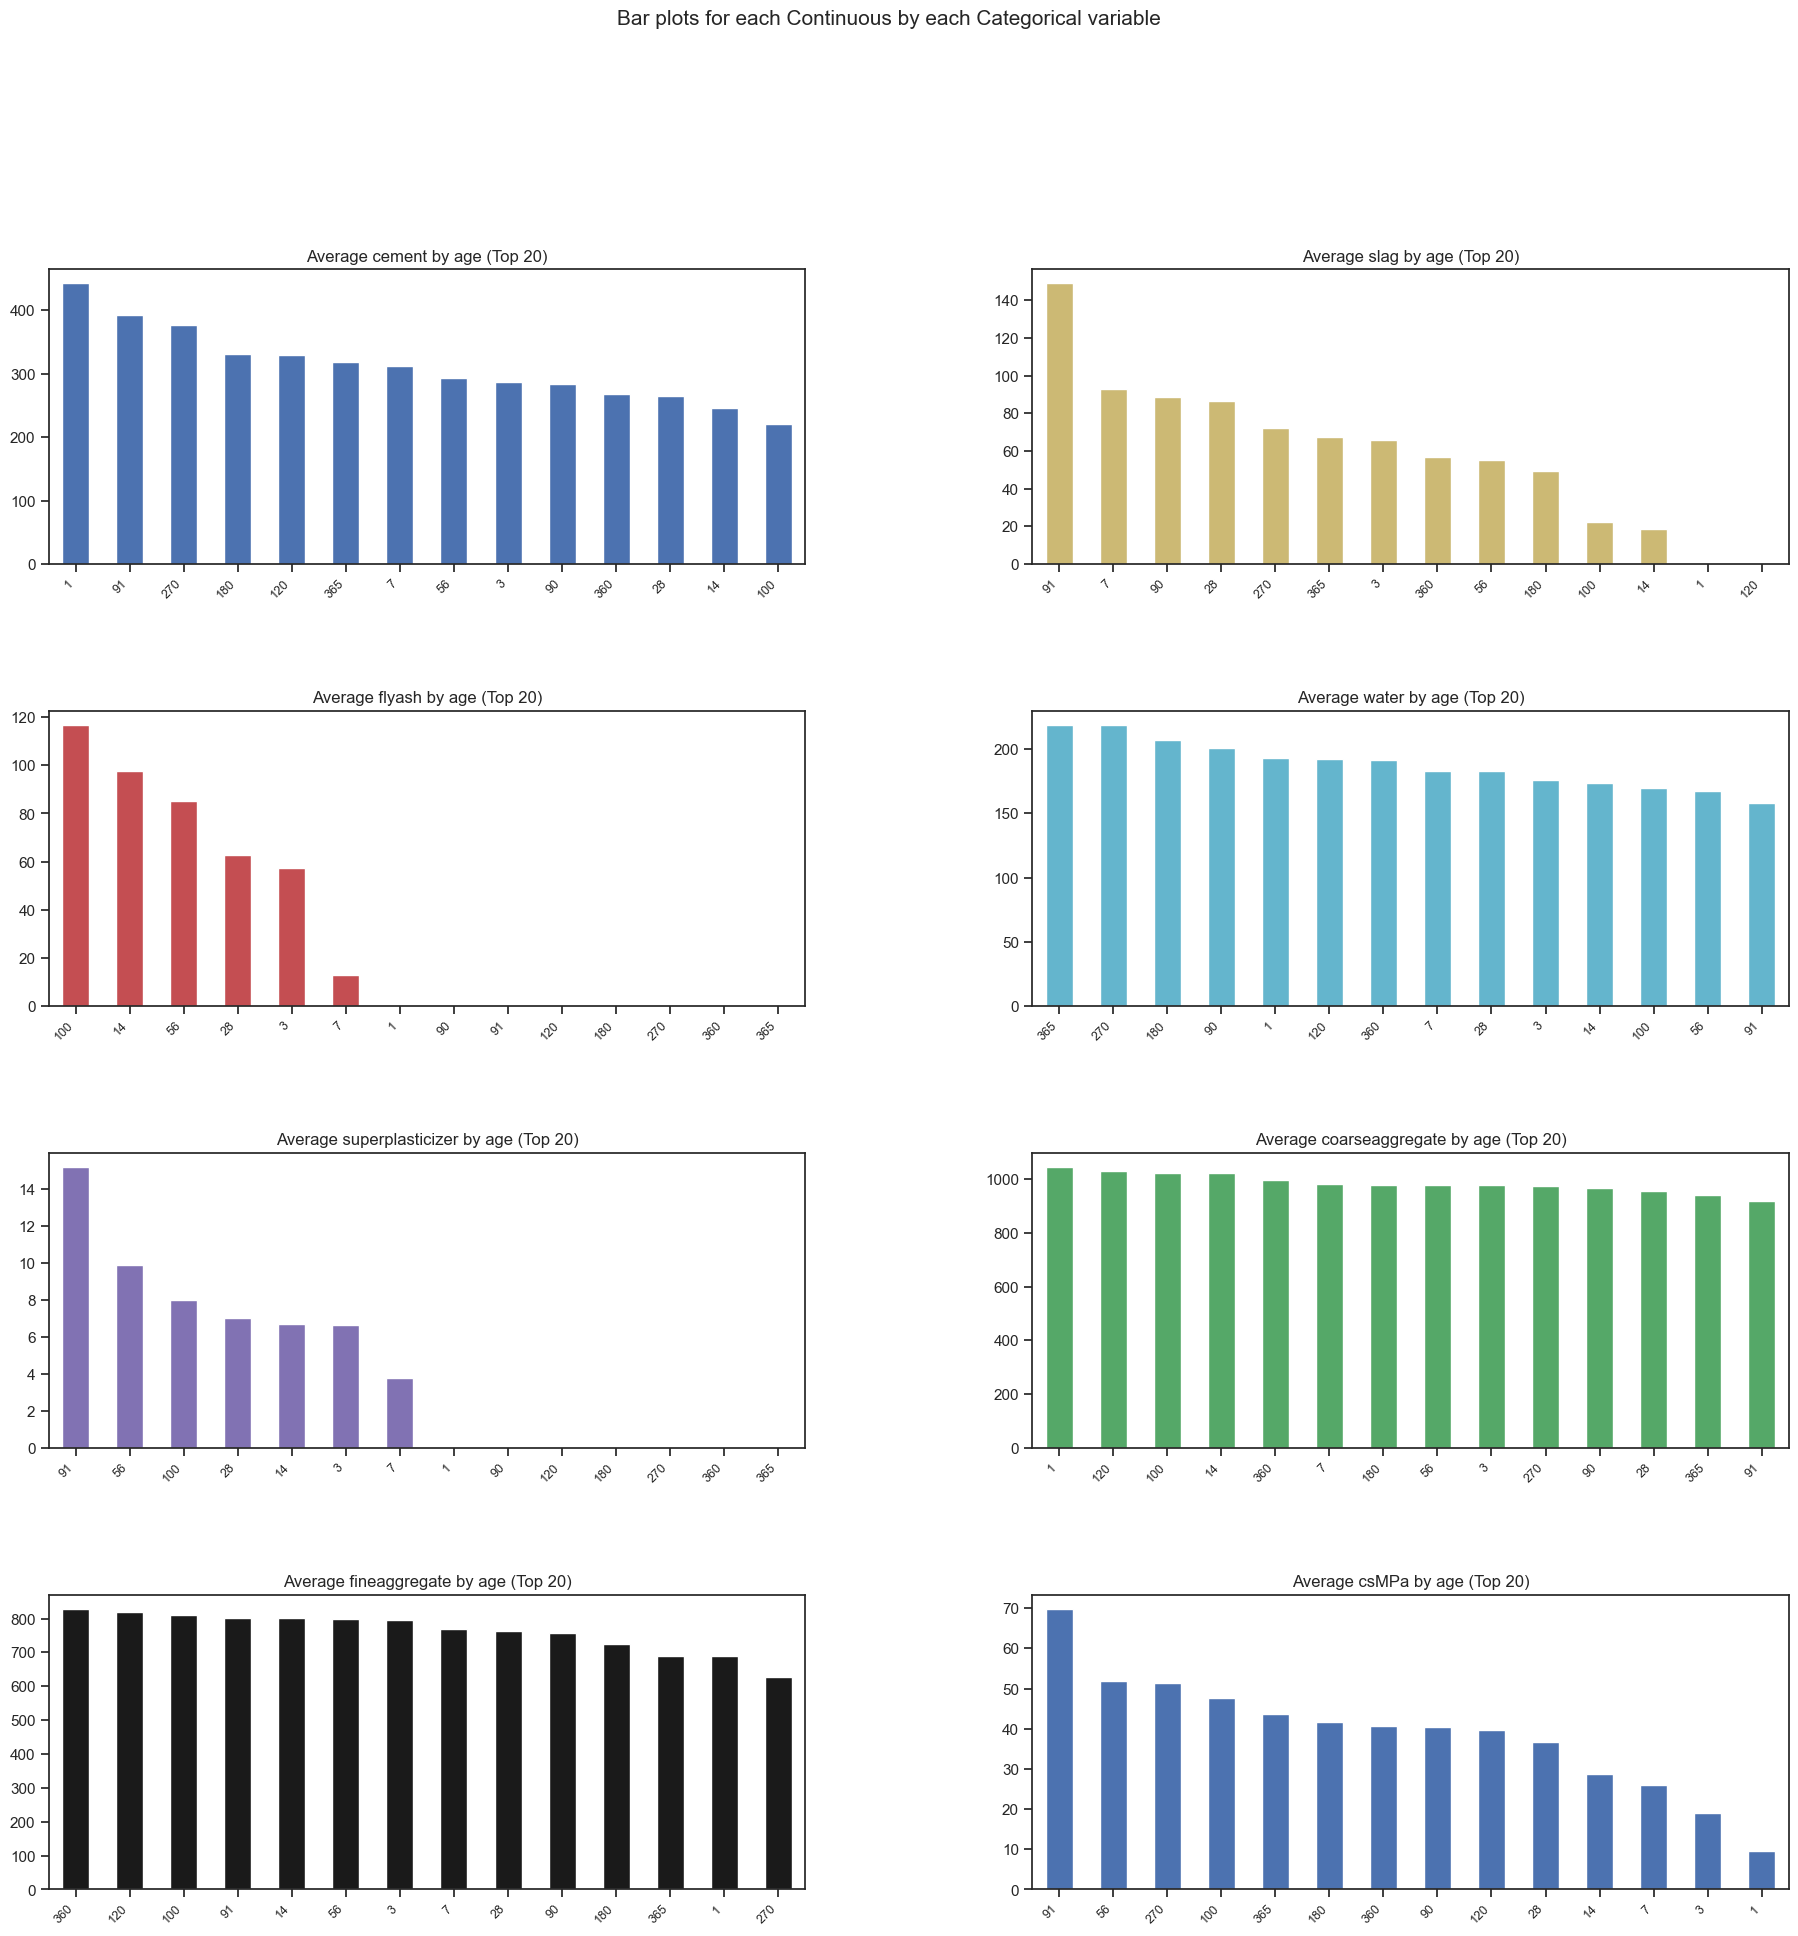

All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
All plots have been saved in a single PDF: ./AutoViz_Plots/AutoViz_Plots.pdf


In [21]:
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# Initialize AutoViz
AV = AutoViz_Class()

# Create a directory to save the plots
save_dir = "./AutoViz_Plots/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Run AutoViz
df = AV.AutoViz(
    filename="Concrete_Data_Yeh.csv",
    sep=",",
    depVar="csMPa",  # Target variable
    save_plot_dir=None,  # Not saving automatically via AutoViz
    chart_format="png"  # Optional format setting
)

# Save all generated plots in a single PDF
pdf_path = os.path.join(save_dir, "AutoViz_Plots.pdf")

with PdfPages(pdf_path) as pdf:
    for fig_num in plt.get_fignums():  # Get all active figure numbers
        fig = plt.figure(fig_num)  # Retrieve the figure
        pdf.savefig(fig)  # Save the figure to the PDF
        plt.close(fig)  # Close the figure after saving to free memory

print(f"All plots have been saved in a single PDF: {pdf_path}")



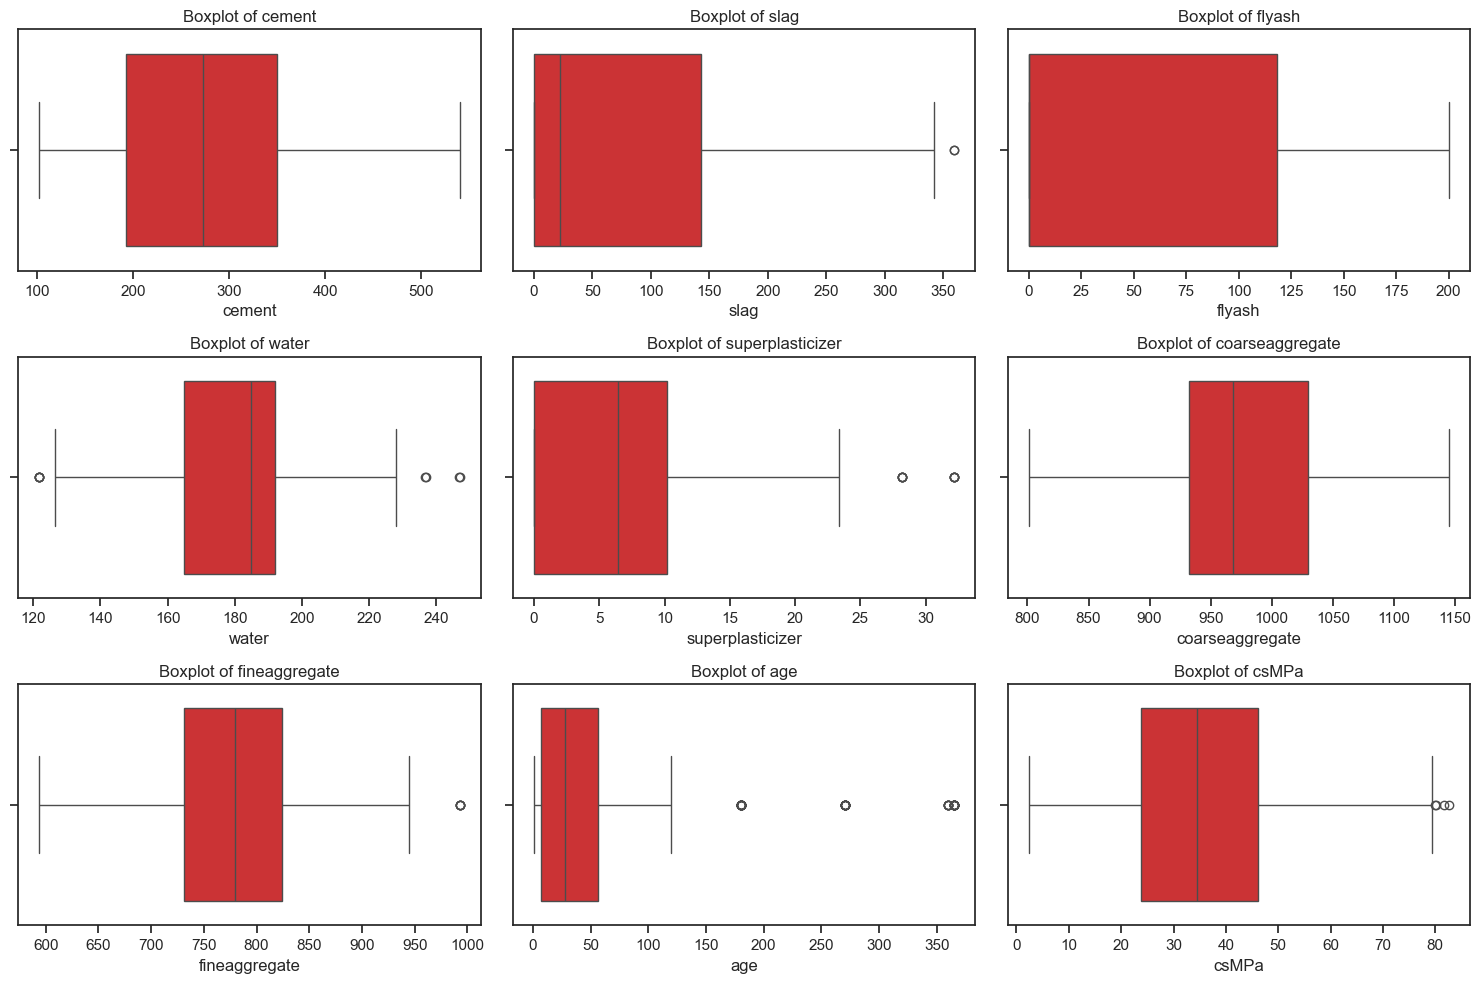

In [29]:
# Create a box plot for each feature to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


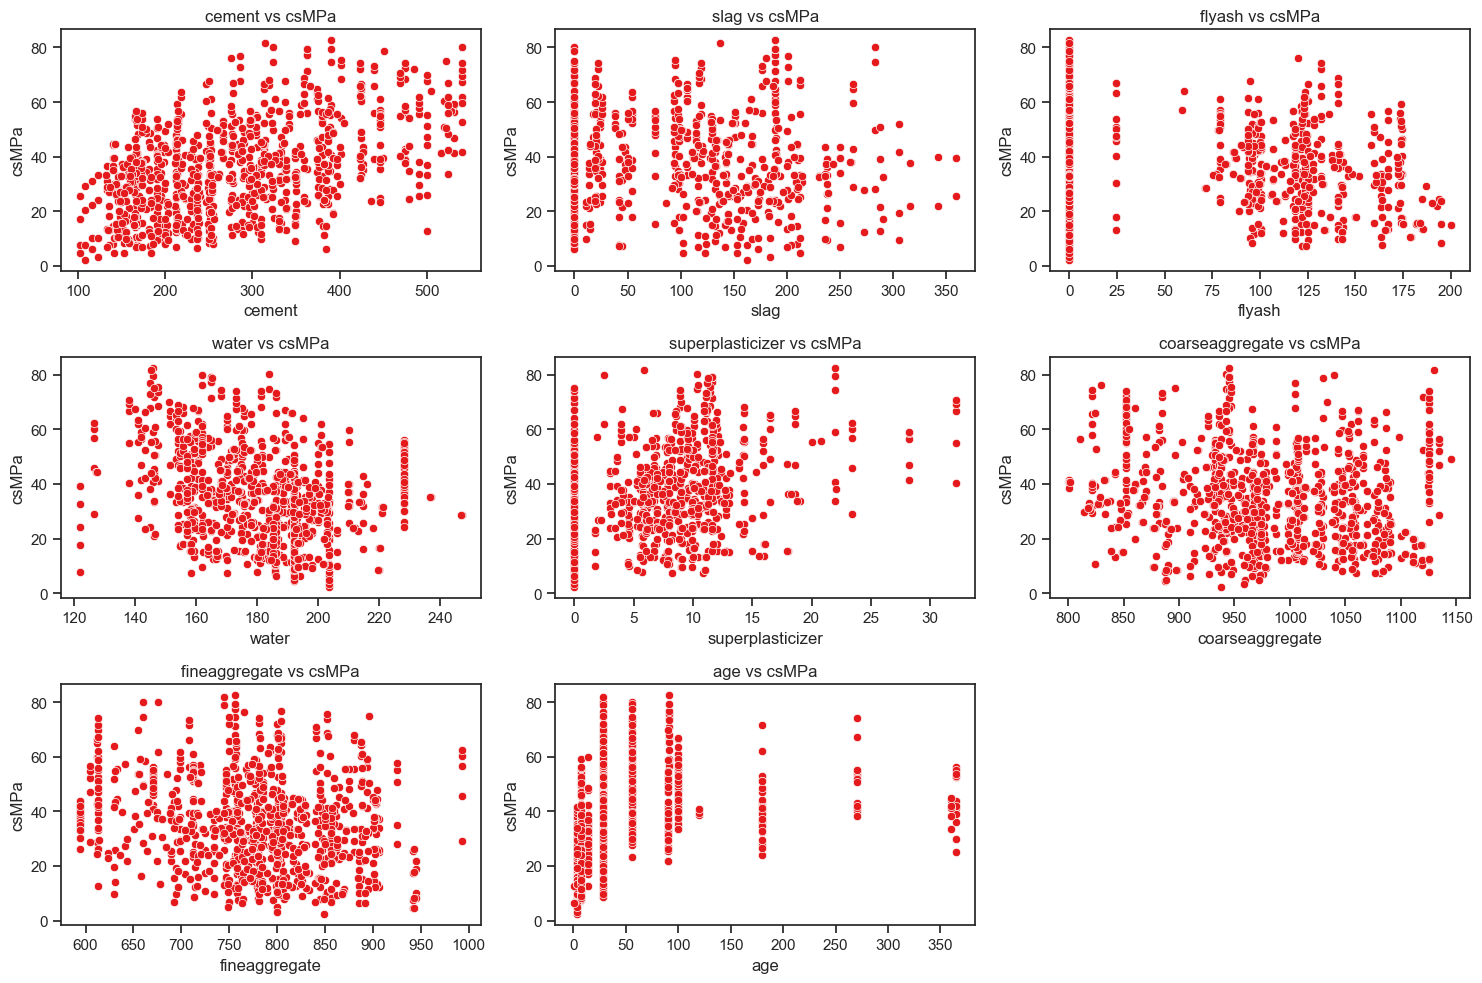

In [30]:
# Scatter plots to visualize the relationship of each feature with csMPa
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Exclude the target variable (csMPa)
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['csMPa'])
    plt.title(f'{col} vs csMPa')
plt.tight_layout()
plt.show()


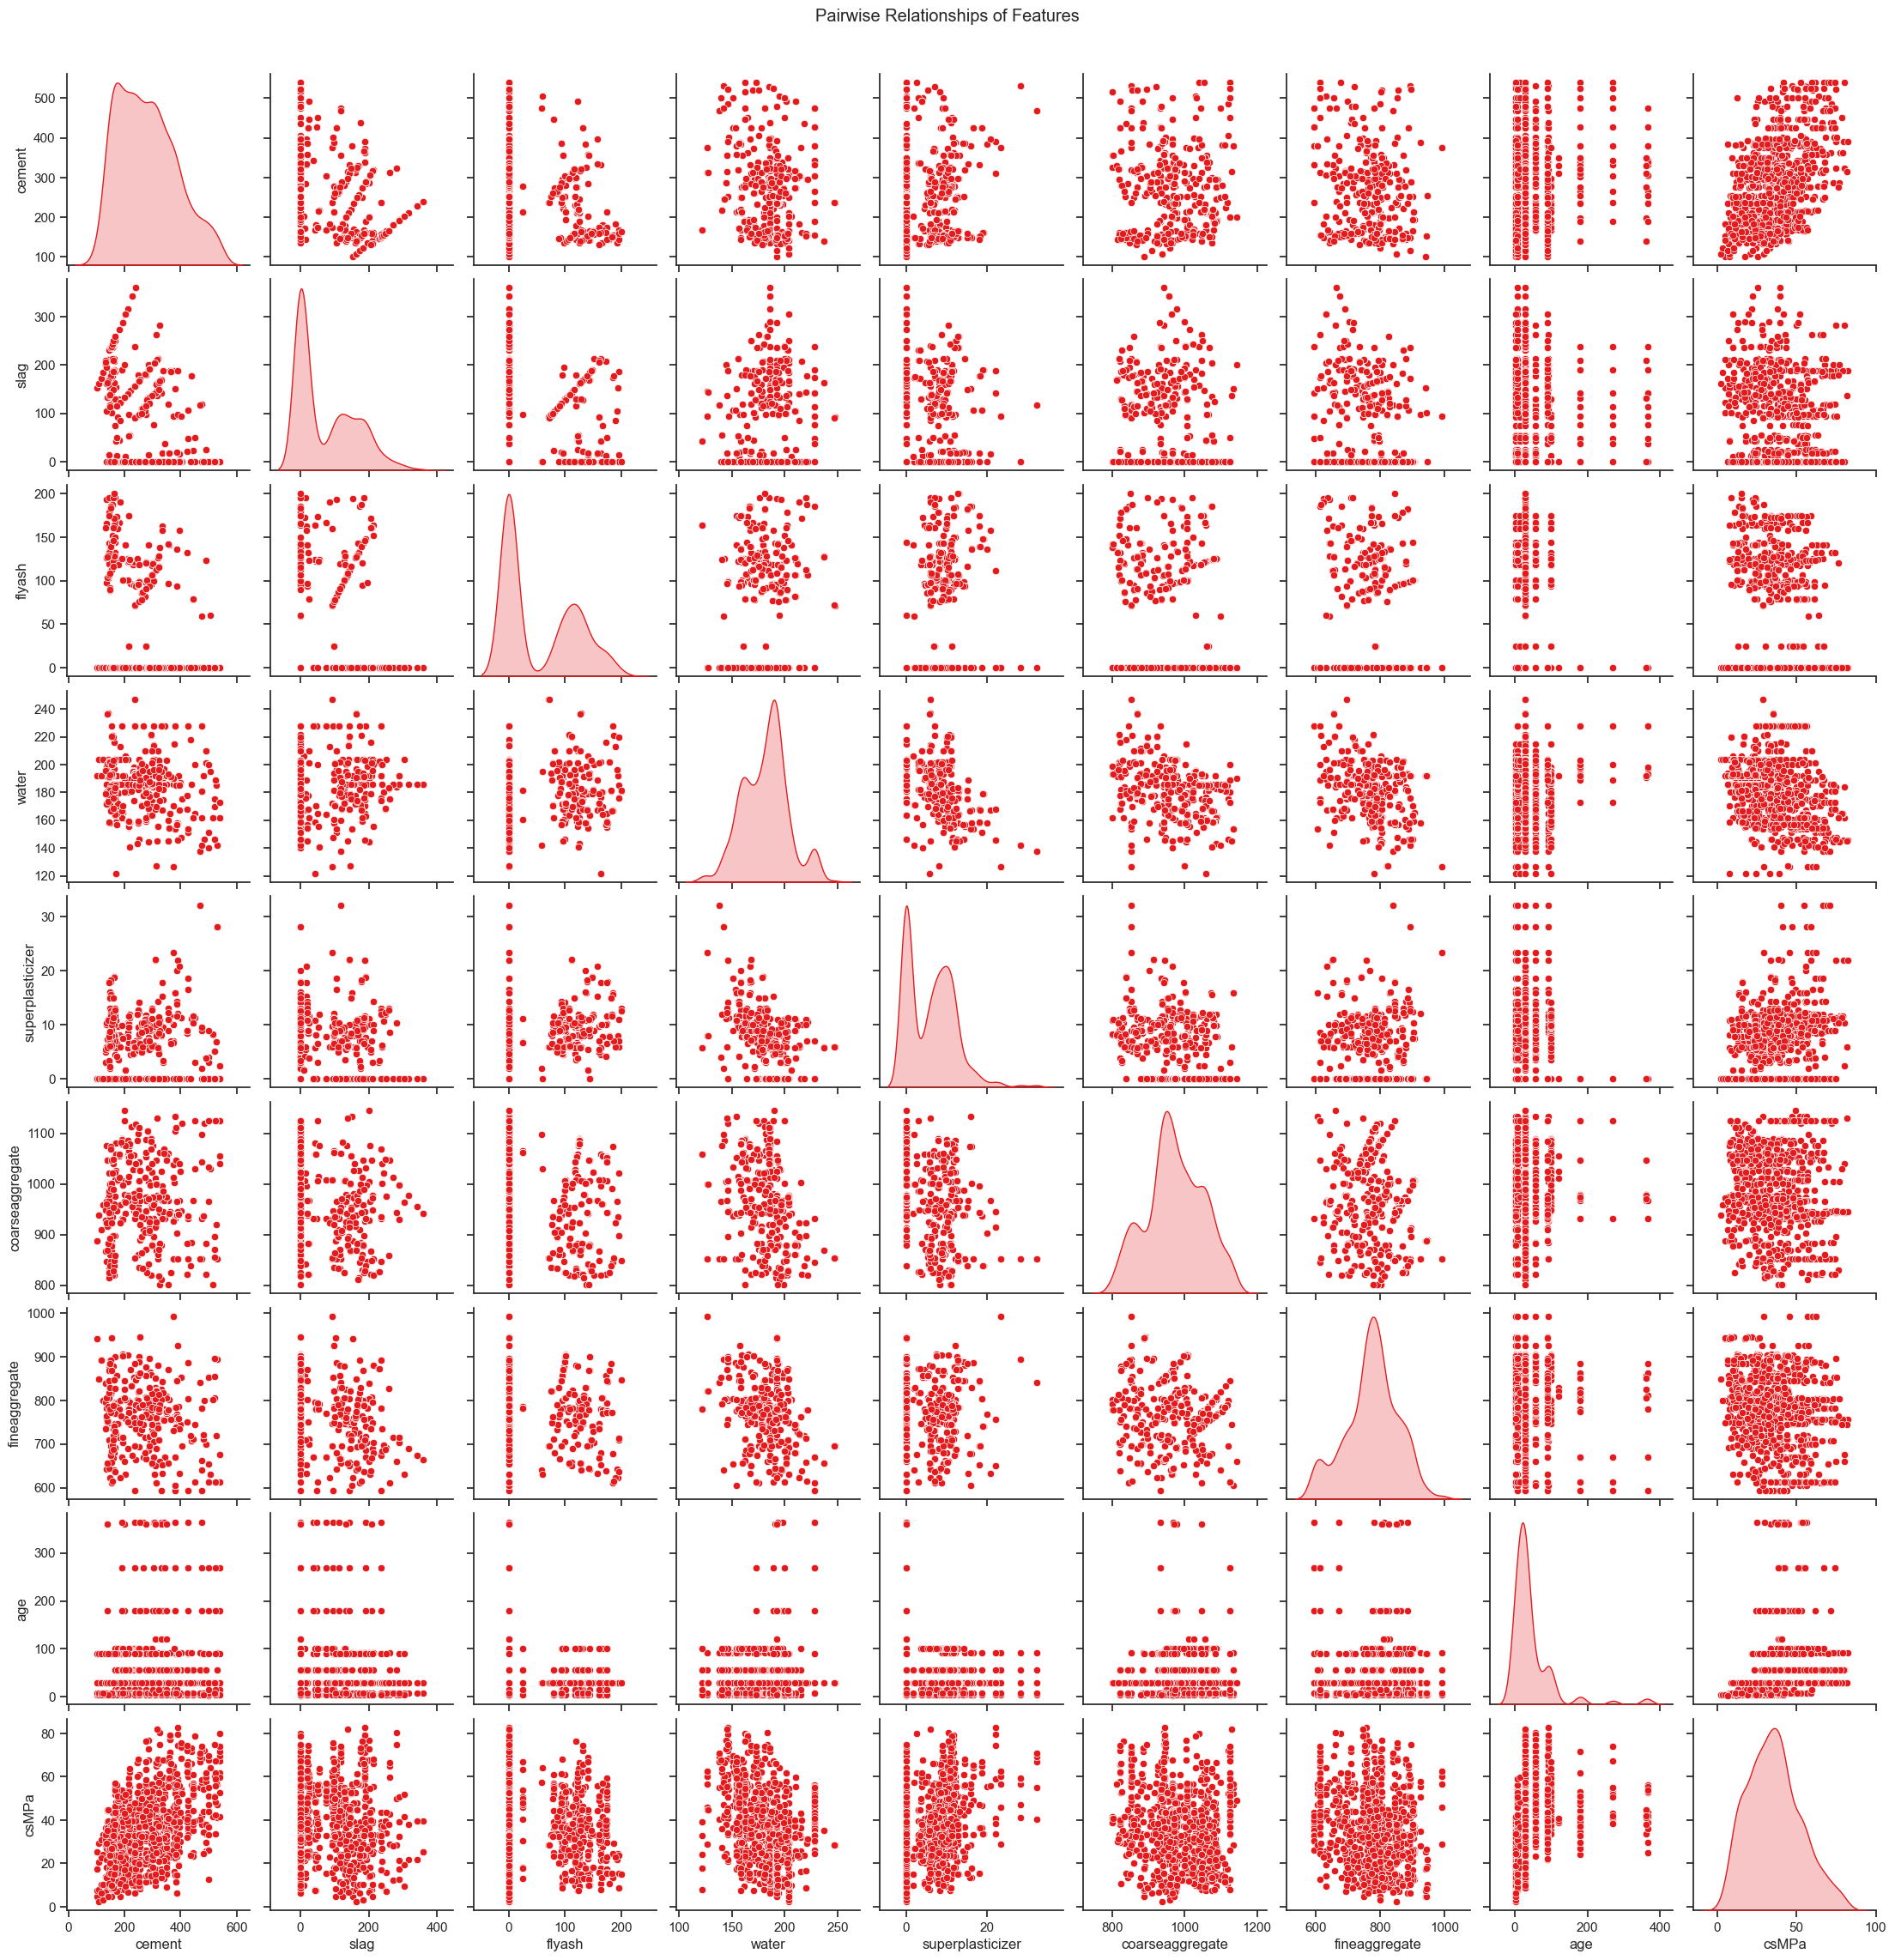

In [33]:

sns.pairplot(df, kind='scatter', diag_kind='kde')

# Show the plot

plt.suptitle('Pairwise Relationships of Features', y=1.02)
plt.show()


#### Feature Distributions:

Most features exhibit skewed distributions, as seen in the diagonal histograms. For instance:
"Cement" and "Water" appear right-skewed (most values concentrated at lower ranges).
"Flyash" has a strong concentration of values at 0, indicating many instances have no flyash content.
"Age" has discrete values, likely representing specific testing intervals.
#### Correlation Patterns:

##### Strong Positive Relationships:
"Cement" shows a positive relationship with the target variable (likely strength, labeled as "ConcreteStrength").
Features such as "Superplasticizer" and "Cement" might have moderate positive trends.
##### Strong Negative/Weak Relationships:
"Water" appears to have a weak negative relationship with "ConcreteStrength".
Other relationships, like "Flyash" vs. "ConcreteStrength," are scattered with no clear trend.
#### Clustered Data:

Many features (e.g., "Flyash", "Water") show discrete clusters, potentially indicating specific mix designs or production practices.
Outliers and Uniformity:

There are potential outliers in several features, particularly in "Cement" and "Flyash."
Features such as "Superplasticizer" also show many zero values, possibly indicating no use of this additive in many instances.
#### Multicollinearity Indicators:

Certain feature pairs, like "Cement" and "Superplasticizer," seem moderately correlated, which might affect model multicollinearity.**

## Splitting x and y

In [35]:
# Define features (X) and target (y)
X = data.drop('csMPa', axis=1)  # Independent variables
y = data['csMPa']  # Target variable


## Split the dataset into training and testing sets


In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training set size: {y_train.shape}")
print(f"Testing set size: {y_test.shape}")



Training set size: (824, 8)
Testing set size: (206, 8)
Training set size: (824,)
Testing set size: (206,)


## Scaling the features using StandardScaler


In [38]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Building

In [61]:
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBRegressor": XGBRegressor(n_estimators=100, random_state=42),
    "LGBMRegressor": LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoostRegressor": CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
}

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

# Train models and evaluate
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append(evaluate_model(y_test, y_pred, model_name))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Save results to a CSV file
#results_df.to_csv("model_evaluation_scores.csv", index=False)


Training RandomForestRegressor...
Training GradientBoostingRegressor...
Training XGBRegressor...
Training LGBMRegressor...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.857864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

**Best Performing Model: CatBoost Regressor**

R² (0.934): The CatBoost Regressor explains 93.4% of the variance in the target variable, which is the highest among all models.

MSE (16.95): The mean squared error is the lowest, indicating that CatBoost makes smaller squared errors on average.

RMSE (4.12): The root mean squared error is the smallest, reflecting a smaller deviation between predicted and actual values.

MAE (2.89): The mean absolute error is the lowest, showing that CatBoost’s predictions are closest to the actual values on average.

Conclusion: CatBoost Regressor is the most accurate and reliable model for this dataset.